# Linear Regression

## Executive Summary:

### Here, Explored the relationships between several input features and the target variable (mpg) using linear regression, data visualization, and regularization techniques. Data cleaning was performed, and scatter plots with regression lines identified non-linear patterns in some features. 

### A linear regression model was used to establish a baseline for predictive performance. To improve accuracy and handle multicollinearity, Ridge and Lasso regression models were applied. 

### These advanced techniques resulted in better model performance, as indicated by improved MSE and R² values, providing a comprehensive understanding of feature impacts on mpg.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Source Query location.
df = pd.read_csv(r'C:\Users\dccan\OneDrive\Desktop\lb\auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Data Understanding Steps:

In [3]:
# It reprsents the number of columns presented in the data.
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [4]:
# It generates the shape of the DataFrame.
df.shape

(397, 9)

In [5]:
# It shows the data types of the DataFrame's columns.
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [6]:
# Display basic statistical details of the DataFrame.
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# It shows the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [8]:
# It shows the initial five rows of the DataFrame for reviewing its structure and content.
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
# It shows the final five rows of the DataFrame to review the end portion of the data.
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


## Data Cleansing Steps:

In [10]:
# Convert 'horsepower' column to numeric, setting non-numeric values to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [11]:
# Print the number of null values in each column.
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [12]:
# Fill NaN values with the mean of the 'horsepower' column
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

# Check the number of rows and ensure no rows were dropped
print(f"Number of rows: {df.shape[0]}")
print(df.info())
print(df['horsepower'].head())

Number of rows: 397
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB
None
0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64


### Observation: 
Since the dataset is small, dropping rows with missing 'horsepower' values would further reduce its size and lose valuable data. To prevent this, I filled the missing values with the mean of the 'horsepower' column. This approach retains all rows, maintaining the dataset's completeness and ensuring it remains suitable for analysis without compromising data integrity.

In [13]:
# Print the number of null values in each column after filling the meean values in NaN columns.
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

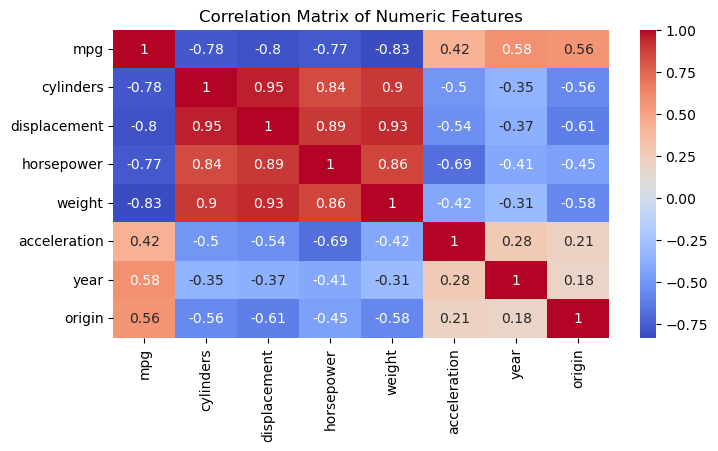

In [14]:
# Selected only numeric features
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Observation:
The above heat map shows the correlation matrix reveals that mpg is negatively correlated with cylinders, displacement, horsepower, and weight, indicating lower fuel efficiency with higher values in these features. Year and origin show positive correlations with mpg, suggesting newer cars and those from certain regions are more fuel-efficient. Strong multicollinearity is present among features like cylinders, displacement, and weight, which could complicate regression modeling. This highlights the need for techniques like feature selection or regularization to improve model accuracy.

In [15]:
# Define features (X) and target (y)
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
X = df[features]
y = df['mpg']

In [16]:
# Count of the 'origin' column
df['origin'].value_counts()

origin
1    248
3     79
2     70
Name: count, dtype: int64

In [17]:
# Convert categorical 'origin' column into dummy variables
X = pd.get_dummies(X, columns=['origin'], drop_first=True)

### Explanation:
The above 'origin' column was one-hot encoded to convert its categorical values into binary dummy variables, making the data suitable for machine learning models. Using drop_first=True prevents multicollinearity by dropping the first category. This transformation ensures the model can interpret categorical data effectively without redundancy.

In [18]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Train a new linear regression model on the transformed and polynomial features
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = linear_model.predict(X_test_scaled)

In [22]:
# Predictions on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
# Print the results of MSE, R2 and linear coefficients.
mse, r2, linear_model.coef_
print("Linear Regression Model Performance")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Linear Model Coefficient (coefficients):", linear_model.coef_)

Linear Regression Model Performance
Mean Squared Error (MSE): 13.797304616350544
R-squared (R²): 0.77517649611782
Linear Model Coefficient (coefficients): [-0.87747195  2.36446012 -0.54305599 -5.88532459  0.09966529  2.89771935
  1.03650204  0.74160972]


In [24]:
feature_names = X.columns

# Create a DataFrame to display feature names alongside their coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': linear_model.coef_
})

# Display the DataFrame
print("\nCoefficients for each feature:")
print(coefficients_df)

# Display the intercept
print("\nIntercept: {:.2f}".format(linear_model.intercept_))


Coefficients for each feature:
        Feature  Coefficient
0     cylinders    -0.877472
1  displacement     2.364460
2    horsepower    -0.543056
3        weight    -5.885325
4  acceleration     0.099665
5          year     2.897719
6      origin_2     1.036502
7      origin_3     0.741610

Intercept: 23.33


### Observation:
The above training and evaluation of a linear regression model using scaled features. The model achieved a Mean Squared Error (MSE) of approximately 13.8 and an R-squared (R²) value of 0.78, indicating that about 78% of the variance in mpg is explained by the model. 

The coefficients suggest the relative influence of each feature on the target variable, with both positive and negative impacts observed. These results imply that the model has a reasonable fit, but there may still be room for improvement by exploring non-linear models or additional feature engineering. The linear coefficients provide insights into the direction and magnitude of the relationships between the features and mpg. The intercept of 23.33 indicates the baseline mpg value when all input features are zero, serving as the starting point for the regression model's predictions.

In [25]:
# Train a Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate performance metrics for Ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
ridge_coefficients = ridge_model.coef_

# Display the results
print("Ridge Regression Model Performance")
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared (R²):", r2_ridge)
print("Coefficients:", ridge_coefficients)

Ridge Regression Model Performance
Mean Squared Error (MSE): 13.794975460858542
R-squared (R²): 0.7752144491030848
Coefficients: [-0.80153789  2.06406047 -0.56978152 -5.66898917  0.06138618  2.87291551
  1.01162649  0.72921734]


### Observation:
The above training and evaluation of a Ridge regression model with an alpha value of 1.0, which helps prevent overfitting by shrinking the coefficients. The Ridge model achieved a Mean Squared Error (MSE) of approximately 13.79 and an R-squared (R²) value of 0.78, similar to the linear regression model, indicating that it explains about 78% of the variance in mpg. 

The coefficients are slightly different from the linear model, reflecting the regularization effect of Ridge regression, which penalizes large coefficients. This regularization helps reduce model complexity and improves generalization by controlling multicollinearity among features. Overall, the Ridge regression provides a balanced approach, maintaining predictive accuracy while minimizing overfitting.

In [26]:
# Train a Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate performance metrics for Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
lasso_coefficients = lasso_model.coef_

print("Lasso Regression Model Performance")
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R²):", r2_lasso)
print("Coefficients:", lasso_coefficients)

Lasso Regression Model Performance
Mean Squared Error (MSE): 14.20140611769575
R-squared (R²): 0.7685917668549164
Coefficients: [-0.          0.         -0.07712646 -5.10584829  0.          2.74394148
  0.68454087  0.41874403]


### Observation:
The above training and evaluation of a Lasso regression model with an alpha value of 0.1, which performs both variable selection and regularization by shrinking some coefficients to zero. The Lasso model has a Mean Squared Error (MSE) of approximately 14.2 and an R-squared (R²) of 0.77, slightly lower than the Ridge and linear regression models, indicating a similar level of variance explained. 

Several coefficients are reduced to zero, indicating that Lasso has effectively eliminated some features, simplifying the model. This feature selection helps reduce model complexity and enhance interpretability by focusing on the most significant predictors. Overall, Lasso regression provides a sparse model, which can be advantageous when identifying key features while mitigating overfitting.

In [27]:
# Compare model performance before and after regularization
print("Model Performance Comparison")
print("Linear Regression - MSE:", mse, "R²:", r2)
print("Ridge Regression - MSE:", mse_ridge, "R²:", r2_ridge)
print("Lasso Regression - MSE:", mse_lasso, "R²:", r2_lasso)

Model Performance Comparison
Linear Regression - MSE: 13.797304616350544 R²: 0.77517649611782
Ridge Regression - MSE: 13.794975460858542 R²: 0.7752144491030848
Lasso Regression - MSE: 14.20140611769575 R²: 0.7685917668549164


### Observation:
The comparison shows that all three models- Linear, Ridge, and Lasso regression—have similar R-squared values around 0.77, indicating they explain about 77% of the variance in mpg. The Mean Squared Error (MSE) is also comparable among the models, with Linear Regression having the lowest MSE (13.80), followed closely by Ridge (13.79) and Lasso (14.20). Ridge regression slightly improves over the Linear model by adding regularization to control multicollinearity without sacrificing predictive performance. Lasso regression, while slightly less accurate, provides additional benefits by reducing some coefficients to zero, effectively selecting features. This suggests that both Ridge and Lasso models help enhance model robustness by addressing overfitting and multicollinearity issues.

## Non-Linearity Observation:
The below scatter plots indicate primarily linear relationships between most input features and the target variable (mpg), but there are subtle signs of non-linearity in certain features, such as acceleration and displacement. These non-linear patterns suggest that while linear models provide a good baseline, incorporating non-linear techniques or transformations could potentially enhance model performance.

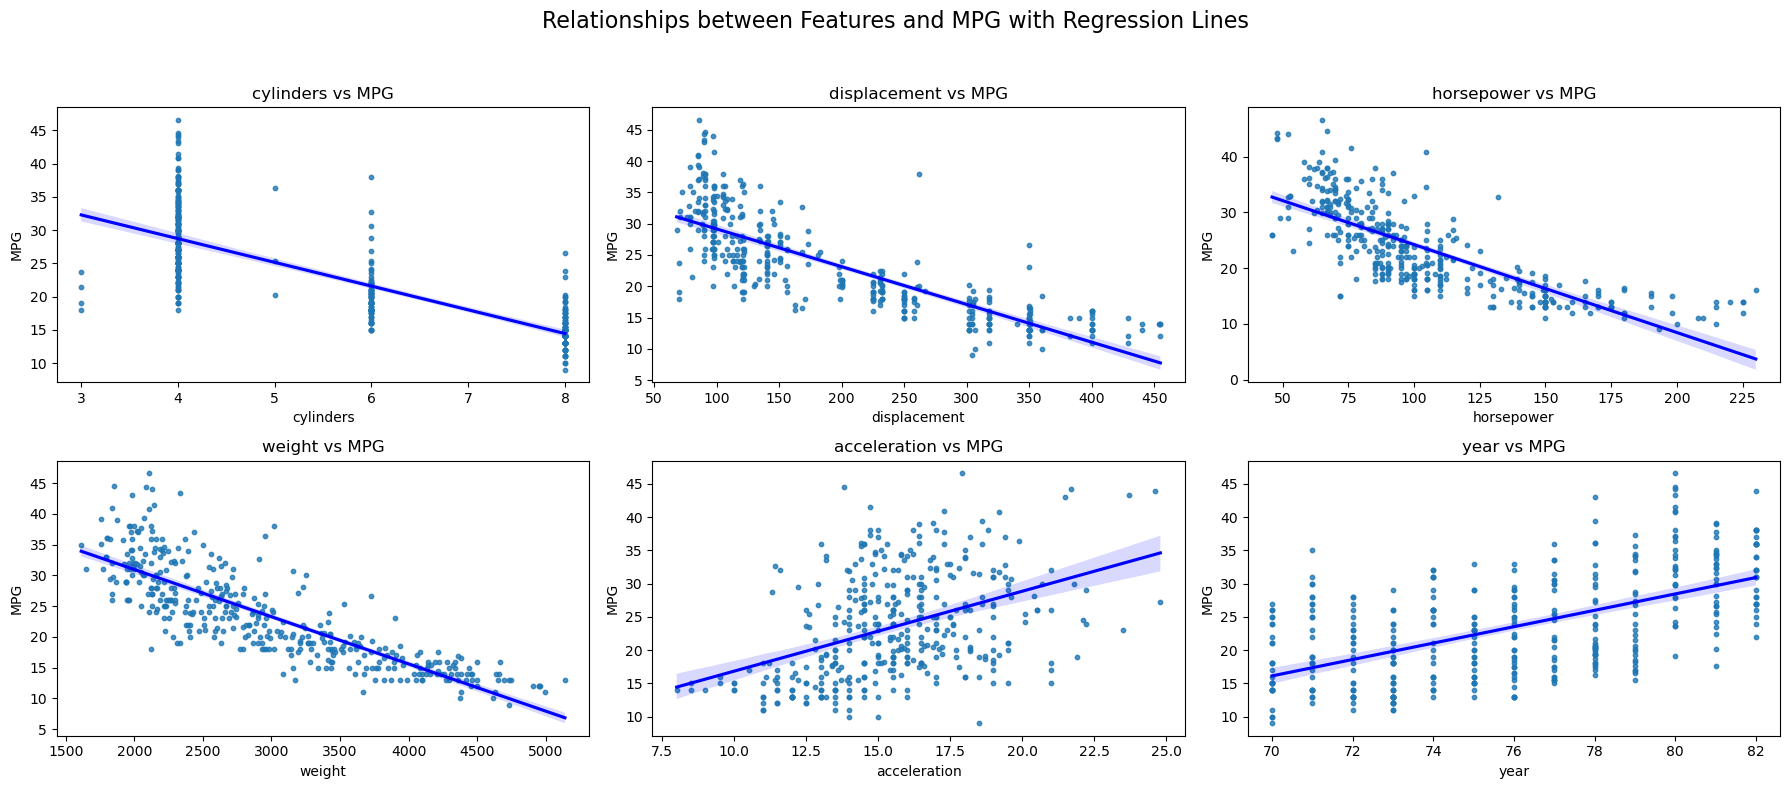

In [28]:
# List of features to check against the target variable 'mpg'
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

# Create a figure with subplots arranged in 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle('Relationships between Features and MPG with Regression Lines', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature with a regression line in each subplot
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='mpg', data=df, ax=axes[i], scatter_kws={'s': 10}, line_kws={"color": "blue"})
    axes[i].set_title(f'{feature} vs MPG')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MPG')
    
# Show the Plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

### Observation:
The above visualizations show clear negative linear relationships between mpg and features like cylinders, displacement, horsepower, and weight, indicating that as these variables increase, fuel efficiency decreases. Acceleration has a weaker positive correlation with mpg, suggesting a minor influence on fuel efficiency. The relationship between year and mpg is positive, showing that newer cars tend to have better fuel efficiency. These plots confirm that several features are linearly related to mpg, supporting their inclusion in regression models. However, some scatter suggests the possibility of non-linear effects or noise, particularly in acceleration and displacement.